# Problem 4, Parts C-E: Stochastic Gradient Descent Visualization

In this Jupyter notebook, we visualize how SGD works. This visualization corresponds to parts C-E of question 4 in set 1.

Use this notebook to write your code for problem 4 parts C-E by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from sgd_helper import (
    generate_dataset1,
    generate_dataset2,
    plot_dataset,
    plot_loss_function,
    animate_convergence,
    animate_sgd_suite
)

## Problem 4C: Implementation of SGD

Fill in the loss, gradient, and SGD functions according to the guidelines given in the problem statement in order to perform SGD.

In [2]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    sq_loss = np.sum((Y - np.dot(X, w)) ** 2)
    return sq_loss
    
    pass

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    sq_gradient = -2 * x * (y - np.dot(w, x))
    return sq_gradient
    
    pass

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    w = w_start
    losses = np.array([])
    W = np.array([])
    
    for i in range(N_epochs):
        index = np.random.permutation(len(Y))
        W = np.append(W, w)
        losses = np.append(losses, loss(X, Y, w))
        for j in index:
            w = w - eta * gradient(X[j], Y[j], w)
    
    return W.reshape((N_epochs, len(w))), losses
    
    pass

## Problem 4D: Visualization

### Dataset

We'll start off by generating two simple 2-dimensional datasets. For simplicity we do not consider separate training and test sets.

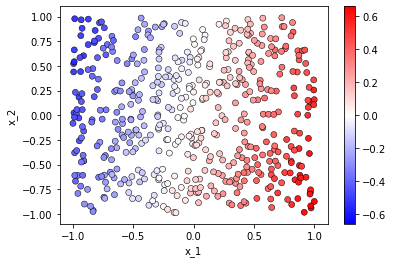

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13a00678ac8>)

In [3]:
X1, Y1 = generate_dataset1()
plot_dataset(X1, Y1)

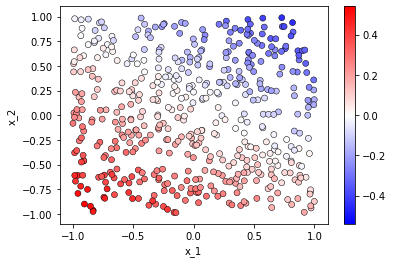

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13a009b51d0>)

In [4]:
X2, Y2 = generate_dataset2()
plot_dataset(X2, Y2)

### SGD from a single point

First, let's visualize SGD from a single starting point:

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1e-05} ...

Animating...


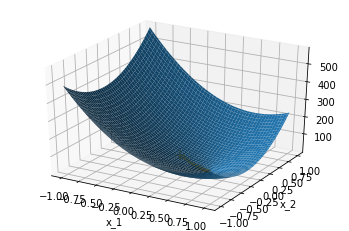

In [5]:
# Parameters to feed the SGD.
# <FR> changes the animation speed.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's animate it!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
HTML(anim.to_html5_video())

Let's view how the weights change as the algorithm converges:


Animating...


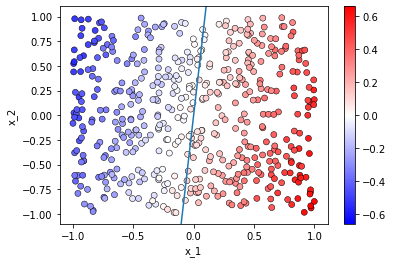

In [6]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's do it!
W, _ = SGD(X1, Y1, params[0]['w_start'], params[0]['eta'], N_epochs)
anim = animate_convergence(X1, Y1, W, FR)
HTML(anim.to_html5_video())

### SGD from multiple points

Now, let's visualize SGD from multiple arbitrary starting points:

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...

Animating...


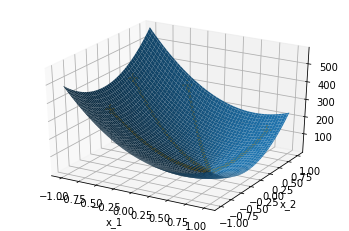

In [7]:
# Parameters to feed the SGD.
# Here, we specify each different set of initializations as a dictionary.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Let's go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
HTML(anim.to_html5_video())

Let's do the same thing but with a different dataset:

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...

Animating...


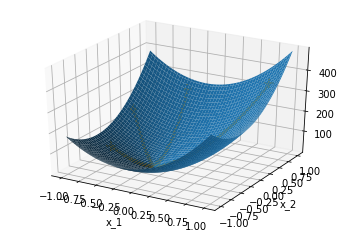

In [8]:
# Parameters to feed the SGD.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Animate!
anim = animate_sgd_suite(SGD, loss, X2, Y2, params, N_epochs, FR)
HTML(anim.to_html5_video())

## Problem 4E: SGD with different step sizes

Now, let's visualize SGD with different step sizes (eta):

(For ease of visualization: the trajectories are ordered from left to right by increasing eta value. Also, note that we use smaller values of N_epochs and FR here for easier visualization.)

Performing SGD with parameters {'w_start': [0.7, 0.8], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.2, 0.8], 'eta': 5e-05} ...
Performing SGD with parameters {'w_start': [-0.2, 0.7], 'eta': 0.0001} ...
Performing SGD with parameters {'w_start': [-0.6, 0.6], 'eta': 0.0002} ...

Animating...


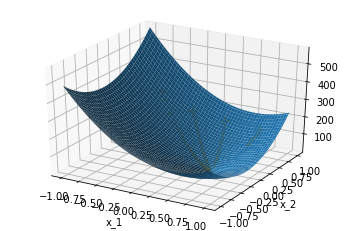

In [9]:
# Parameters to feed the SGD.
params = (
    {'w_start': [0.7, 0.8], 'eta': 0.00001},
    { 'w_start': [0.2, 0.8], 'eta': 0.00005},
    {'w_start': [-0.2, 0.7], 'eta': 0.0001},
    {'w_start': [-0.6, 0.6], 'eta': 0.0002},
)
N_epochs = 100
FR = 2

# Go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
HTML(anim.to_html5_video())

### Plotting SGD Convergence

Let's visualize the difference in convergence rates a different way. Plot the loss with respect to epoch (iteration) number for each value of eta on the same graph.

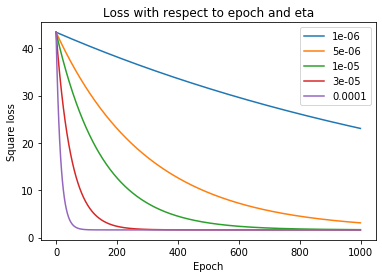

In [10]:
'''Plotting SGD convergence'''

eta_vals = [1e-6, 5e-6, 1e-5, 3e-5, 1e-4]
w_start = [0.01, 0.01]
N_epochs = 1000

for eta in eta_vals:
    W, losses = SGD(X1, Y1, w_start, eta, N_epochs)
    plt.plot(losses, label=str(eta))

plt.title('Loss with respect to epoch and eta')
plt.xlabel('Epoch')
plt.ylabel('Square loss')
plt.legend(loc = "best")
plt.show()

Clearly, a big step size results in fast convergence! Why don't we just set eta to a really big value, then? Say, eta=1?

(Again, note that the FR is lower for this animation.)

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1} ...

Animating...


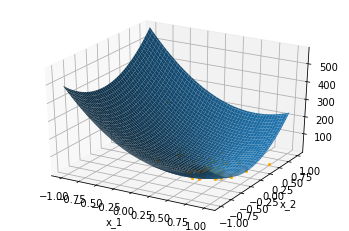

In [11]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 1},)
N_epochs = 100
FR = 2

# Voila!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
HTML(anim.to_html5_video())

Just for fun, let's try eta=10 as well. What happens? (Hint: look at W)

In [12]:
# Parameters to feed the SGD.
w_start = [0.01, 0.01]
eta = 10
N_epochs = 100

# Presto!
W, losses = SGD(X1, Y1, w_start, eta, N_epochs)

C:\Users\Changhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in multiply


## Extra Visualization (not part of the homework problem)

One final visualization! What happens if the loss function has multiple optima?

In [13]:
# Import different SGD & loss functions.
# In particular, the loss function has multiple optima.
from sgd_multiopt_helper import SGD, loss

# Parameters to feed the SGD.
params = (
    {'w_start': [0.9, 0.9], 'eta': 0.01},
    { 'w_start': [0.0, 0.0], 'eta': 0.01},
    {'w_start': [-0.8, 0.6], 'eta': 0.01},
    {'w_start': [-0.8, -0.6], 'eta': 0.01},
    {'w_start': [-0.4, -0.3], 'eta': 0.01},
)
N_epochs = 100
FR = 2

# One more time!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
HTML(anim.to_html5_video())

ModuleNotFoundError: No module named 'sgd_multiopt_helper'